<a href="https://colab.research.google.com/github/tolani007/Fun-Data-Science-Content-from-Tiki/blob/main/Brainstation_data_science_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MATPLOTLIB PRACTICE STEEZE



1.  Which model of aircraft flew the most flights out of New York in 2023?

2. Use the file customer_info.csv to perform the exercise.

a)   Create a new DataFrame called construction which contains all the customers in the "Construction" industry with over 0 spend on mobility products. Using this DataFrame, create a scatterplot with Mobility revenue on the vertical axis and number of employees on the horizontal axis. Does this tell you anything about the relationship between Mobility revenue and number of employees? What does it tell you?

b) Copy the code from part (1) and add in two lines underneath: plt.xscale('log') and plt.yscale('log'). These two lines rescale the axes so that instead of showing the raw figures, the logarithm of the figures is shown instead. This is often a useful transformation for data that is extremely skewed. How does the rescaled plot differ from the plot you created in part 1? Why? Can you discern anything about the relationship between Mobility revenue and number of employees that you couldn't before?

c) Repeat parts (1) and (2) for the Agriculture industry. How does the relationship between Mobility and number of employees differ in this industry from the Construction industry? Why do you think that might be?

In [ ]:
# Q1

flights = pd.read_csv('data/flights.csv')
planes = pd.read_csv('data/planes.csv')

#Join the datasets together based on tailnum.
#Using a right join discards any flights that didn't have a matching plane.
#This is fine as we can't use flights where we don't know the model of the aircraft
detailed_flights = pd.merge(flights, planes, how='right', on='tailnum')

#Group the flights by their model number and count how many flights there are for each model
flights_by_model = detailed_flights.groupby('model')
flight_count_by_model = flights_by_model.size()
flight_count_by_model

In [1]:
import pandas as pd

In [2]:
#Q1
flights = pd.read_csv('/content/flights.csv')
planes = pd.read_csv('/content/planes.csv')

I join my datasets together based on tailnum

I use right join to remove any flights that did not have any matching plane



In [3]:
detailed_flights = pd.merge(flights, planes, how='right', on ='tailnum')

Then I group my flights by their model number and count how many flights there are for each model

In [4]:
flights_by_model = detailed_flights.groupby('model')


In [5]:
flights_count_by_model = flights_by_model.size()
print(flights_count_by_model)

model
717-200             3658
737-700              263
737-71B               63
737-71Q              440
737-724             7013
                   ...  
ERJ 170-100 SE      9717
ERJ 170-100SU       4029
ERJ 170-200 LL       245
ERJ 170-200 LR     77090
ERJ 190-100 IGW    19677
Length: 92, dtype: int64


Now I find the index(model) with the most flights

In [6]:
flights_count_by_model.idxmax()

'ERJ 170-200 LR'

a) Create a new DataFrame called construction which contains all the customers in the "Construction" industry with over 0 spend on mobility products.

Using this DataFrame, create a scatterplot with Mobility revenue on the vertical axis and number of employees on the horizontal axis. Does this tell you anything about the relationship between Mobility revenue and number of employees? What does it tell you?

In [8]:
customer_info_pd = pd.read_csv('/content/customer_info (lesson 3 brainstation.csv')

In [9]:
customer_info_pd

,CUSTOMER_ID,INDUSTRY,EMP,ANNUAL_SALES,STATE,MOBILITY,INTERNET
0,129078,Finance and Insurance,36.0,NaN,TX,10192.825459,699.539869
1,128424,Construction,261.0,10675108.0,NY,17367.492873,1907.819410
2,125960,Finance and Insurance,10.0,756786.0,TX,6162.609229,1789.017919
3,120981,Construction,31.0,1223808.0,NY,19176.373541,2123.016418
4,129251,Education,NaN,1148650.0,TX,1538.194116,1620.096543
...,...,...,...,...,...,...,...
9995,128551,Finance and Insurance,30.0,1740370.0,NY,796.064772,7985.736865
9996,125090,Construction,51.0,2758514.0,NY,6330.410019,10344.420439
9997,129035,Food Services,97.0,2200024.8,TX,1033.965711,2529.527266
9998,126395,Food Services,40.0,1745366.0,NY,3246.858268,9542.715917


In [11]:
construct = customer_info_pd[(customer_info_pd['INDUSTRY'] == 'Construction') & (customer_info_pd['MOBILITY'] > 0)]


In [12]:
construct

,CUSTOMER_ID,INDUSTRY,EMP,ANNUAL_SALES,STATE,MOBILITY,INTERNET
1,128424,Construction,261.0,10675108.00,NY,17367.492873,1907.819410
3,120981,Construction,31.0,1223808.00,NY,19176.373541,2123.016418
5,128936,Construction,288.0,9197420.44,TX,10177.116938,8509.512884
6,120612,Construction,287.0,12744917.00,NY,18418.015877,16184.978195
11,126049,Construction,72.0,3590242.00,NY,8010.260516,0.000000
...,...,...,...,...,...,...,...
9974,128299,Construction,244.0,12206771.00,NY,26387.257719,1453.058747
9983,129036,Construction,124.0,5842134.00,NY,7513.843430,9071.441693
9985,126291,Construction,16.0,797384.40,TX,3685.258953,6421.579031
9986,126805,Construction,82.0,3351784.68,TX,3070.326214,6750.961837


<Axes: xlabel='EMP', ylabel='MOBILITY'>

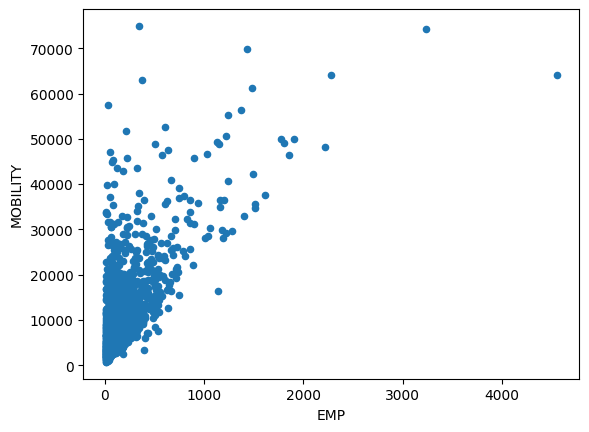

In [13]:
construct.plot(x = 'EMP',y = 'MOBILITY', kind = 'scatter')

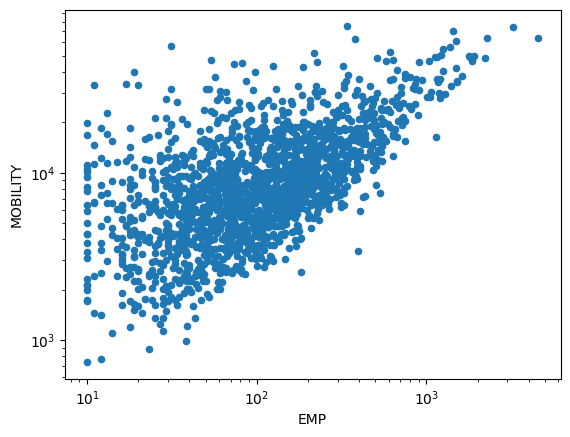

In [19]:
df = pd.read_csv('/content/customer_info (lesson 3 brainstation.csv')
construct = df[(df["INDUSTRY"] == 'Construction') & (df["MOBILITY"] > 0)]
plt = construct.plot(x = "EMP", y = "MOBILITY", kind = "scatter");
plt.set_xscale('log')
plt.set_yscale('log')

The more employees the more likely the mobility spend but there is a cluster of a certain relative mobility spend despite the number of employees in the center of the latent space.

 Repeat parts (1) and (2) for the Agriculture industry. How does the relationship between Mobility and number of employees differ in this industry from the Construction industry? Why do you think that might be?

In [23]:
agric_df = df[(df['INDUSTRY'] == 'Agriculture') & (df['MOBILITY'] > 0)]
agric_df.plot(x = 'EMP',y = 'MOBILITY', kind= 'scatterplot');




ValueError: scatterplot is not a valid plot kind Valid plot kinds: ('line', 'bar', 'barh', 'kde', 'density', 'area', 'hist', 'box', 'pie', 'scatter', 'hexbin')

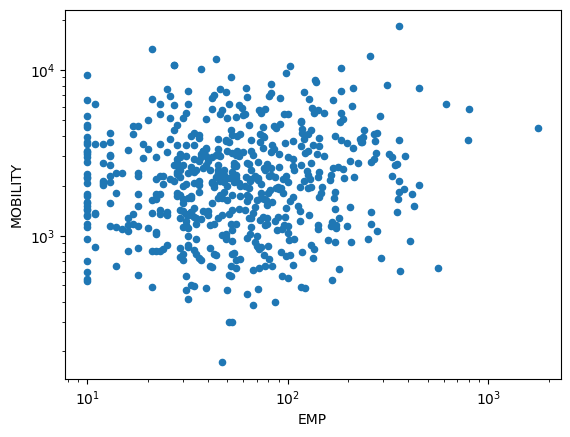

In [25]:
import matplotlib.pyplot as plt
agric_df = df[(df['INDUSTRY'] == 'Agriculture') & (df['MOBILITY'] > 0)]
ax_agric = agric_df.plot( x = 'EMP', y = 'MOBILITY', kind = 'scatter')
ax_agric.set_xscale('log')
ax_agric.set_yscale('log')
plt.show()
